# Project 4: West Nile Virus
**Members**: DJ  | Nazira  |  Sean  |  Shuyi

# Organisation of codebooks
1. **Data collection, EDA, Feature engineering**
2. Pre-processing, model tuning and conclusions
3. Cost-benefit analysis

# Background

West Nile virus (WNV), a mosquito-borne zoonotic disease, was first identified in the United States in the summer of 1999 in New York City. Since its first successful invasion in New York, WNV quickly adapted to the local populations of Culex vector mosquitoes and avian populations and rapidly spread throughout the United States. 

The first major WNV outbreak in the United States was observed in 2002, when more than 4,150 human cases and 284 deaths attributable to WNV infection were reported to the CDC from 40 states compared to only 149 cases and 19 deaths from 10 states cumulatively during the three years from 1999 to 2001. This stirred a prompt public health response from federal, state, and local public health agencies and led to the establishment of a more robust surveillance of mosquitoes and birds to monitor and control the spread of WNV.

Public health surveillance for West Nile virus (WNV) involves collection and testing of Culex vector mosquitoes, collection and testing of dead birds suspected to have died of WNV, testing of sentinel chickens or of wild birds captured for this purpose, and reporting of cases of human and equine illness. The ultimate goal of these surveillance data is to target mosquito control, and thereby reduce illness through the reduction of the number of infected vector mosquitoes, and to target educational messages to warn citizens to reduce individual exposure. 

One additional advantage of having a strong surveillance system in place is that the long-term data generated can be integrated with publicly available weather, landscape, and socioeconomic data and can be used effectively to identify the important drivers of WNV transmission and to develop predictive models.

In Illinois, WNV human infections have been endemic since 2002, with annual variability in the number of cases. The majority of the human WNV cases have been reported from the northeastern region, where the largest number of people in the state is congregated.

# Problem Statement

**What we are looking to solve**: We are looking to improve the cost-effectiveness of existing strategies in tackling adult mosquito populations and mitigating the spread of the West Nile Virus (WMV). 

**How we plan on solving it**: We will build a machine learning algorithm to predict the presence of the West Nile Virus, using data on past weather conditions and locations where the WMV was detected.

**Proposed Implementation**: Our tool can be employed to effectively carry out targeted spraying of specific at-risk neighbourhoods. This will ultimately help the City of Chicago save costs and better re-allocate resources in its task to prevent / mitigate the spread of the WMV.

**Success evaluation**: We evaluate success as the final model being able to provide sufficiently high level of classification accuracy based on:

1. F1 score: Where it doesn't only take into account number of prediction errors but the type of errors made, hence suitable for imbalanced class problems

2. AUC ROC score: Classification separability will be our metric to determine how distinctive classes are

**Who cares?** Any person who is living within potential breeding hotspots for mosquitoes bearing West Nile virus. With a larger social and economic impact extending to next of kin.

**Audience and the primary and secondary stakeholders**: We are presenting to members of the CDC, biostatisticians and epidemiologists & decision-makers. To address the concerns of the primary stakeholders, the government and residents of the Chicago. Secondary stakeholders are residents of Illinois. 

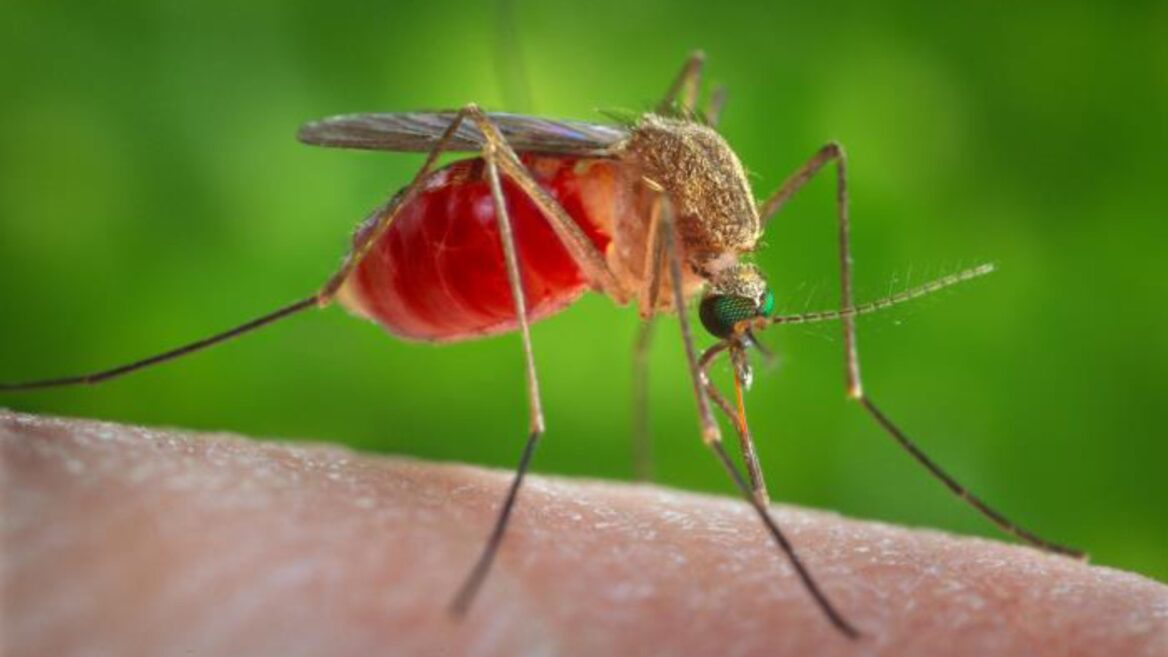

# Scope of the project

1. Cleaning, EDA, Preprocessing
2. Inferential and descriptive statistical analysis
3. Distribution examination
4. SMOTE oversampling for imbalanced class management
5. Performing necessary data scaling
6. Data modeling
7. Hyperparameters tuning
8. SHAP model interpretation
9. Cost benefit analysis
10. Conclusion
11. Recommendation

# External research

**Readings related to West Nile Virus**

1. The drivers of West Nile virus human illness in the Chicago, Illinois, USA area [(link)](https://doi.org/10.1371/journal.pone.0227160)
2. Overview of the West Nile Virus [(link)](https://cookcountypublichealth.org/communicable-diseases/west-nile-virus/)
3. WNV coverage by Chicago NBC News [(here)](https://www.nbcchicago.com/tag/west-nile-virus/)
4. Healthy Chicago: Public surveillance [(link)](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/svcs/report_standing_water.html)
5. West Nile Virus: Hopkins Medicine [(link)](https://www.hopkinsmedicine.org/health/conditions-and-diseases/west-nile-virus)
6. The role of temperature in shaping mosquito-borne viruses transmission [(link)](https://www.frontiersin.org/articles/10.3389/fmicb.2020.584846/full)
7. Mosquitos and West Nile Virus: What should you know and what can you do [(link)](https://stpmad.org/wp-content/uploads/2018/10/West_Nile_virus_pamphlet.pdf)
8. Rising temperatures could shift US WNV transmission [(link)](https://www.nsf.gov/discoveries/disc_summ.jsp?cntn_id=301296&org=NSF&from=news#:~:text=West%20Nile%20virus%20spreads%20most,study%20published%20in%20eLife%20shows.)

# Project Planning

Project planning documentation via a free-to-use project management tool (Monday.com) can be found [here](https://shu168270.monday.com/boards/2332771771).

![Our Kaggle submission](../images/project_planning.png "Our Kaggle submission")

# Data Collection and EDA

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from geopy.distance import geodesic
import scipy
import missingno as msno

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Ensuring our notebook remains tidy
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting our seaborn style and colour palette
sns.set_style('darkgrid')
sns.set_palette('icefire')

In [4]:
# Creating a custom function to kick-start the EDA process
def eda_clean(df):
    print('Dataset Statistics:')
    print(f'Shape of dataframe: {df.shape}')
    print('--------------------------------------')
    print(f'Null values in dataframe: {df.isna().sum().sum()}')
    print('--------------------------------------')
    print(f'% of Null values in dataframe: {round(((df.isna().sum().sum())/(df.shape[0])) * 100, 2)}%')
    print('--------------------------------------')
    print(f"Total duplicate rows: {df[df.duplicated()].shape[0]}")
    print('--------------------------------------')
    print(f"% duplicate rows: {round(df[df.duplicated()].shape[0] / df.shape[0] * 100, 2)}%")
    print(f'\nColumn names: {df.columns}')
    print('\nVariable Types')
    print(f"Columns Count: \n{df.dtypes.value_counts()}")

## A pre-cursor check on ```train``` and ```test``` datasets overlaps

Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for the presence of West Nile virus before the end of the week. The test results include the number of mosquitos, the mosquitos species, and whether or not West Nile virus is present in the cohort.

These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. 

Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are postfixed with letters. For example, T220A is a satellite trap to T220. 

Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitos is found at a certain trap at a certain time. In the test set, we ask you for all combinations/permutations of possible predictions and are only scoring the observed ones.

**What we need to do**: The training set consists of data from 2007, 2009, 2011, and 2013, while in the test set we will need to predict the test results for 2008, 2010, 2012, and 2014.

In [5]:
# Read train and test datasets
train = pd.read_csv('../assets/raw/train.csv', parse_dates=['Date'])
test = pd.read_csv('../assets/raw/test.csv', parse_dates=['Date'])

# Converting columns to lowercase for standardisation
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [6]:
# Taking a quick look at our datasets (Train)
eda_clean(train)

Dataset Statistics:
Shape of dataframe: (10506, 12)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 813
--------------------------------------
% duplicate rows: 7.74%

Column names: Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent'],
      dtype='object')

Variable Types
Columns Count: 
object            5
int64             4
float64           2
datetime64[ns]    1
dtype: int64


In [7]:
# Taking a quick look at our test split
eda_clean(test)

Dataset Statistics:
Shape of dataframe: (116293, 11)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
--------------------------------------
% duplicate rows: 0.0%

Column names: Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy'],
      dtype='object')

Variable Types
Columns Count: 
object            5
int64             3
float64           2
datetime64[ns]    1
dtype: int64


**Thoughts**: Our test split does not have ```nummosquitos``` and ```wnvpresent``` so we will need to remove them from the train dataset later. We also have an unique identifier for our test split (i.e. id). We will need to check if there are unique features for each dataset.

In [8]:
cols_to_check = ['species', 'trap', 'addressnumberandstreet', 'latitude', 'longitude']

for i in cols_to_check:
    print(set(test[i].unique()).difference(set(train[i].unique())))

{'UNSPECIFIED CULEX'}
{'T218A', 'T002A', 'T128A', 'T218C', 'T200B', 'T218B', 'T234', 'T090A', 'T065A', 'T090C', 'T200A', 'T090B', 'T002B'}
{'1100  S LOOMIS ST, Chicago, IL', '4600  N MELVINA AVE, Chicago, IL', '2600  E 136TH ST, Chicago, IL', '1400  W 112TH ST, Chicago, IL', '3400  N LONG AVE, Chicago, IL', '2900  N KENNETH AVE, Chicago, IL', '1000  S OGLESBY AVE, Chicago, IL', '6500  W DAKIN ST, Chicago, IL', '5100  W 63RD PL, Chicago, IL', '1200  S BALTIMORE AVE, Chicago, IL', '4000  N KEDVALE AVE, Chicago, IL', '1200  W 120TH ST, Chicago, IL', '3700  N KILBOURN AVE, Chicago, IL'}
{41.965571, 41.777689, 41.942285, 41.951878, 41.933652, 41.868533, 41.646541, 41.94828, 41.738583, 41.95477, 41.731929, 41.690423, 41.675876}
{-87.761726, -87.789234, -87.74134, -87.661638, -87.781978, -87.738416, -87.73089, -87.54854, -87.567726, -87.749149, -87.651515, -87.543762, -87.656929}


In [9]:
test['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

**Thoughts**: Thankfully, these important variables (we have selected) are fairly standardised within both datasets. There is an additional group of species (Unspecified culex) in our test dataset. Other than ```date```, we can pipe in our custom features to tidy our test split later.

In [10]:
# We will need to adjust for duplicate records as the number of mosquitos associated with a trap is capped at 50
train = train.groupby([col for col in train.columns if col not in ['nummosquitos', 'wnvpresent']]).sum()
train.reset_index(inplace=True)

# Rejigging our wnvpresent levels
train['wnvpresent'] = train['wnvpresent'].map(lambda x : 1 if x > 0 else 0)

**Thoughts**: This will reduce the number of rows in the dataset and reduce the total counts of a particular trap

In [11]:
# Let's break the date column down into years, months and weeks; We can then see if there is some seasonality
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['week'] = train['date'].dt.isocalendar().week
train['day'] = train['date'].dt.day
train['year_month'] = train['date'].dt.strftime("%Y-%m")

In [12]:
# Calculate number of traps set
count_traps = train.pivot_table(values=['nummosquitos'], index=['year_month'], columns="wnvpresent", aggfunc='count')

# Calculate total number of mosquitos caught
mosquitos_caught = train.pivot_table(values=['nummosquitos'], index=['year_month'], columns="wnvpresent", aggfunc='sum')

In [13]:
# Are there any duplicate traps placed?
nunique_traps = train['trap'].nunique()
print(f'No. of unique traps employed: {nunique_traps}\n')

# This returns the number of unique addresses tied to a specific trap
trap_addresses = train[['trap','address']].groupby(by='trap').agg({'address':pd.Series.nunique})
print(trap_addresses.loc[trap_addresses['address'] >1].reset_index())

No. of unique traps employed: 136

   trap  address
0  T009        2
1  T035        2


In [14]:
# Which addresses is trap T009 associated with?
train[train['trap']=='T009']['address'].value_counts()

9100 West Higgins Road, Rosemont, IL 60018, USA     69
9100 West Higgins Avenue, Chicago, IL 60656, USA    27
Name: address, dtype: int64

In [15]:
# Which addresses is trap T009 associated with?
train[train['trap']=='T035']['address'].value_counts()

5100 West 72nd Street, Chicago, IL 60638, USA      45
3000 South Hoyne Avenue, Chicago, IL 60608, USA    27
Name: address, dtype: int64

**Thoughts**: Both T009 and T035 appear to be associated with different unique addresses. We can safely conclude that trap identification numbers do not matter much for our dataset, given the lat/long coordinates present.

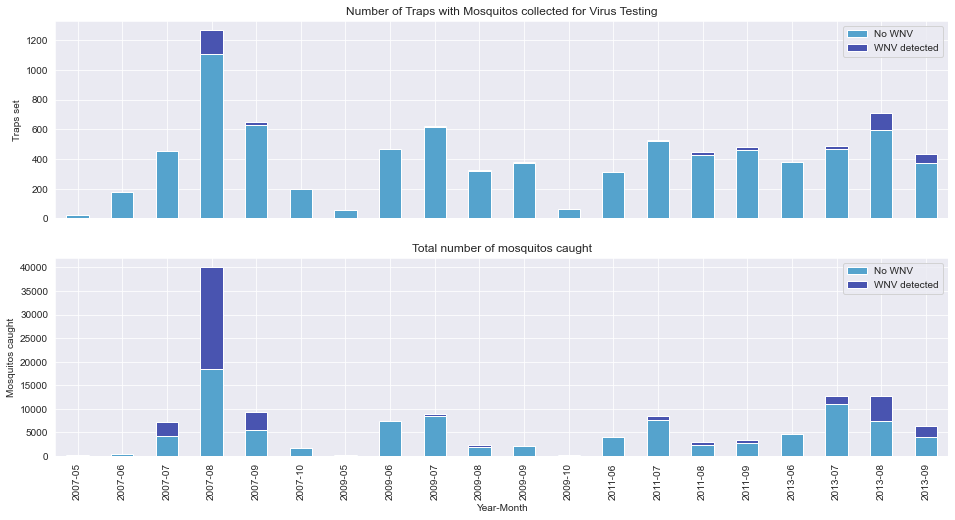

In [16]:
# Visualising trends of traps and mosquitos caught over the past few years
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16,8))

count_traps.plot(ax=axs[0], kind="bar", stacked=True)
axs[0].set_title("Number of Traps with Mosquitos collected for Virus Testing")
axs[0].set_xlabel("")
axs[0].set_ylabel("Traps set")
axs[0].legend(labels=["No WNV", "WNV detected"])

mosquitos_caught.plot(ax=axs[1], kind="bar", stacked=True)
axs[1].set_title("Total number of mosquitos caught")
axs[1].set_xlabel("Year-Month")
axs[1].set_ylabel("Mosquitos caught")
axs[1].legend(labels=["No WNV", "WNV detected"])

**Thoughts**: Sampling efforts differ year-on-year, with 2007 having the most unique traps being deployed, followed by 2013. This corresponds to years with the higher WNV incidence. We will take this into consideration while building our models as sampling efforts would affect whether WNV is detected.

Text(0, 0.5, 'Trap')

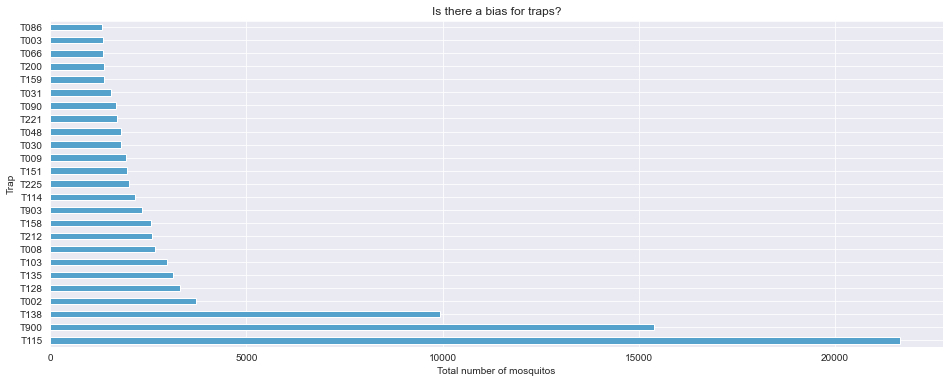

In [17]:
# Is there a bias for certain traps?
plt.figure(figsize=(16,6))
train.groupby('trap')['nummosquitos'].sum().sort_values(ascending=False).head(25).plot(kind="barh")
plt.title("Is there a bias for traps?")
plt.xlabel("Total number of mosquitos")
plt.ylabel("Trap")

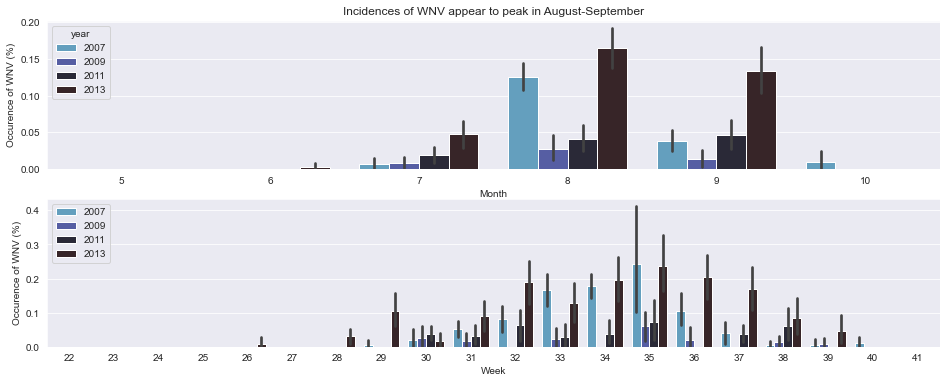

In [18]:
# Visualise occurences of WNV throughout the years
fig, axs = plt.subplots(nrows=2, figsize=(16,6))
sns.barplot(ax=axs[0], data=train, x='month', y='wnvpresent', hue='year')
axs[0].set_title("Incidences of WNV appear to peak in August-September")
axs[0].set_ylabel("Occurence of WNV (%)")
axs[0].set_xlabel("Month")

sns.barplot(ax=axs[1], data=train, x='week', y='wnvpresent', hue='year')
axs[1].set_ylabel("Occurence of WNV (%)")
axs[1].set_xlabel("Week")
plt.legend(loc="upper left")
plt.show()

**Our thoughts**: There appears to be some seasonality effects at play. Incidences of WNV appear to peak in August. We can infer that the week / month are probably drivers to monitor.

**Clustering hot-spots**

While dealing with spatial clusters of different density, size and shape, it could be challenging to detect the cluster of points. The task can be even more complicated if the data contains noise and outliers. To deal with large spatial databases, Martin Ester and his co-authors proposed Density-Based Spatial Clustering of Applications with Noise (DBSCAN), which still remains as one of the highest cited science papers. 

Some of the reasons why we picked this algorithm according to are:
* It requires minimum domain knowledge.
* It can discover clusters of arbitrary shape.
* Efficient for large database, i.e. sample size more than few thousands

In [19]:
def dbscan(df, list_of_columns, eps, min_samples):
    
    df_cluster = df[list_of_columns]

    minmax = MinMaxScaler(feature_range = (0, 1))

    clusters = minmax.fit_transform(df_cluster)

    dbs = DBSCAN(eps = eps, min_samples = min_samples)
    dbs.fit(clusters)
    df['cluster'] = dbs.labels_
    vals = df['cluster'].value_counts()
    print(f'Silhouette Score: {silhouette_score(clusters, dbs.labels_)}')
    print(f'Number of outliers: {vals[-1]} ({vals[-1] * 100 / len(df):.2f}% of samples)')
    print(f'Number of clusters: {len(vals)}')

    fig = plt.figure(figsize = (16, 10))
    ax = plt.axes(projection = '3d')
    ax.scatter3D(df['latitude'], df['longitude'], df['nummosquitos'], c = df['cluster'], cmap = 'icefire')
    ax.set_title(f'DBSCAN for {list_of_columns}\n\u03B5 = {eps} Min. Clusters = {min_samples}')
    plt.show()

**Drawbacks**:
* If the database has data points that form clusters of varying density, then DBSCAN fails to cluster the data points well, since the clustering depends on *eps* and *min_samples* parameter, they cannot be chosen separately for all clusters.
* If the data and features are not so well understood by a domain expert then, setting up *eps* and *min_samples* could be tricky and, may need comparisons for several iterations with different values.

In [20]:
train['coord'] = [(x, y) for x, y in zip(train['latitude'], train['longitude'])]
train_clusters = train.groupby(['date', 'coord']).mean()

Silhouette Score: 0.7178209562748543
Number of outliers: 39 (0.84% of samples)
Number of clusters: 78


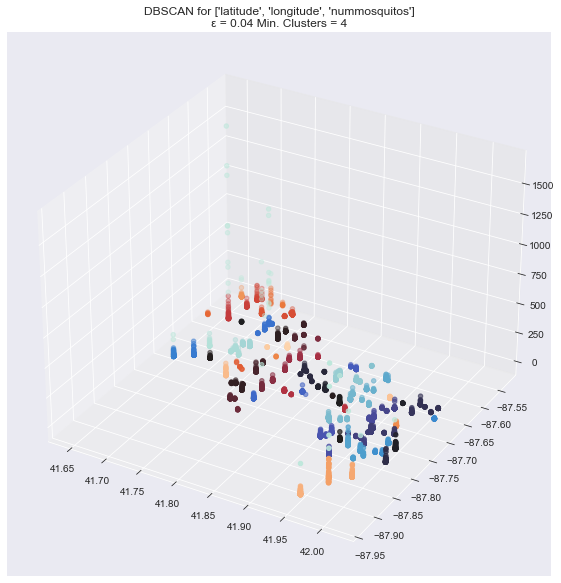

In [21]:
dbscan(train_clusters, ['latitude', 'longitude', 'nummosquitos'], eps = 0.04, min_samples = 4)

**Thoughts**: While this may look like a nice graphic, clusters would likely be transient (depending on where the an outbreak first originated). Additionally, test and train datasets may not necessarily have the same cluster mapping.

In [22]:
# Creating a cluster group
cluster_group_mean = train_clusters.groupby(['coord', 'cluster']).mean()
cluster_group_count = train_clusters.groupby(['coord', 'cluster']).count()
cluster_duplicated = cluster_group_mean.index.get_level_values('coord').duplicated(keep = False)
cluster_outliers = (cluster_group_mean.index.get_level_values('cluster') == -1)

In [23]:
# Dropping duplicate clusters
cluster_mapping = cluster_group_mean.reset_index()
cluster_mapping = cluster_mapping.drop_duplicates(subset = 'coord', keep = 'last')

In [24]:
# Classifying all outliers as a separate group
cluster_mapping[cluster_mapping['cluster'] == -1] = max(cluster_mapping['cluster']) + 1

# Creation of a custom dictionary to map our clusters to the train dataset
cluster_dict = dict(zip(cluster_mapping['coord'], cluster_mapping['cluster']))

In [25]:
# Mapping clusters defined in our dictionary to the train dataset
train['cluster'] = train['coord'].map(cluster_dict)

In [26]:
# Mapping our clusters to our test dataset
test['coord'] = [(x, y) for x, y in zip(test['latitude'], test['longitude'])]
test['cluster'] = test['coord'].map(cluster_dict)

**Thoughts**: Because the test datasets may have different traps (lat/long coordinates), some traps may not be designated a cluster. We can address this using a **K-nearest neighbours classifier** here.

In [27]:
# Instantiate KNN
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
# Checking unique cluster groups for our train dataset
train['cluster'].unique()

array([ 3,  4,  6,  8,  1,  7,  9,  0, 10, 12, 13, 14, 11,  2,  5, 20, 29,
       19, 16, 22, 23, 24, 25, 15, 27, 18, 26, 28, 21, 30, 17, 33, 34, 32,
       31, 35, 37, 36, 38, 39, 40, 46, 57, 53, 44, 52, 55, 56, 51, 54, 50,
       49, 48, 47, 45, 43, 42, 41, 60, 61, 58, 59, 62, 63, 68, 67, 66, 64,
       65, 69, 71, 70, 72, 73, 74, 75, 76], dtype=int64)

In [29]:
# Training our knn model on train dataset coordinates
knn.fit(train[['latitude','longitude']], train['cluster'])

# Mapping our knn model on train dataset coordinates - To forcibly classify clusters in our test dataset
test['cluster'] = knn.predict(test[['latitude','longitude']])

In [30]:
# Write test.csv into an updated file
test.to_csv('../assets/cleaned/test_tidied.csv', index=False)

**Thoughts**: Now that we have tidied up our test dataset. We'll save it under a different name for later use, and we will now go back to cleaning our train dataset

In [31]:
# Let's one-hot encode our cluster column
train_clust = pd.get_dummies(train, columns=['cluster'])

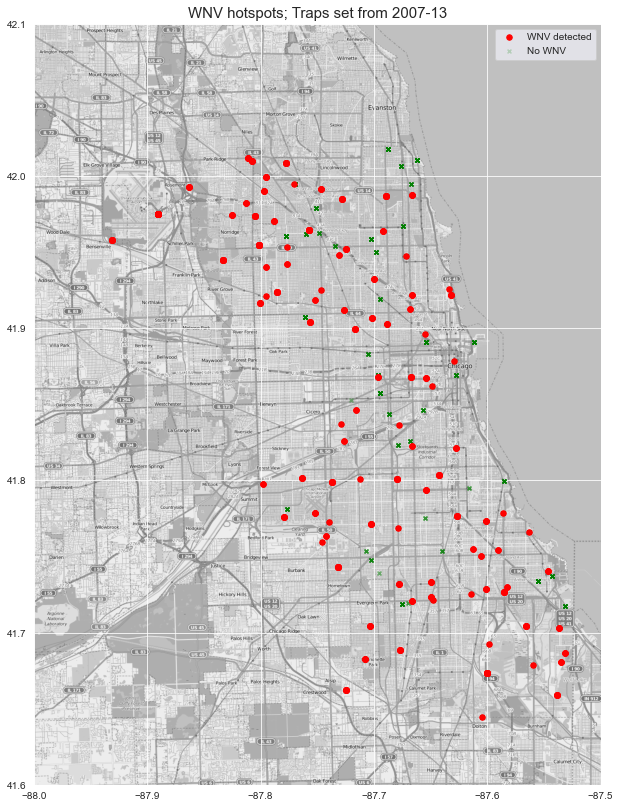

In [32]:
# Let's visualise the locations of traps, as well as the presence of the WNV
mapdata = np.loadtxt("../assets/raw/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


wnv_traps = train.loc[train["wnvpresent"]==1]
ok_traps = train.loc[train["wnvpresent"]==0]

wnv_false = plt.scatter(ok_traps['longitude'], ok_traps['latitude'], c="green", marker='x', s=15, alpha=0.2)
wnv_true = plt.scatter(wnv_traps['longitude'], wnv_traps['latitude'], c="red", marker='o', s=30, alpha=1)

plt.title("WNV hotspots; Traps set from 2007-13", fontsize=15)
plt.legend((wnv_true, wnv_false), ("WNV detected", "No WNV"));

In [33]:
# Does the species of mosquito matter?
species_wnv = train.pivot_table(values=['nummosquitos'], index='species', columns=['wnvpresent'], aggfunc='sum')

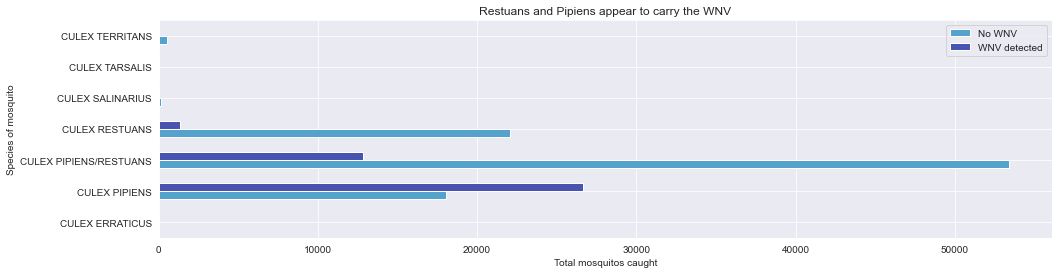

In [34]:
# Visualising the incidence of WNV in different species
g = species_wnv.plot(kind="barh", stacked=False, figsize=(16,4))
g.set_title("Restuans and Pipiens appear to carry the WNV")
g.set_xlabel("Total mosquitos caught")
g.set_ylabel("Species of mosquito")
g.legend(labels=["No WNV", "WNV detected"])

**Thoughts**: Research has shown that *culex pipiens* mosquito species have been implicated as a primary spreader of the West Nile Virus (Refer to sources shown above). This means the type of species may be an important driver, so we'll need to one-hot encode them.

In [35]:
# We can exclude Unsepcified species from this selection
species_of_interest = ['RESTUANS', 'PIPIENS', 
                       'SALINARIUS', 'TERRITANS', 'TARSALIS', 'ERRATICUS'
                      ]

# create a loop to dummify variables to indicate presence of different species
def dummify_species(df):
    for i in species_of_interest:
        df[i] = df['species'].apply(lambda x: 1 if i in x else 0)
    
    return df

In [36]:
# Let's one-hot encode to indicate the presence of different mosquito species in different traps
train_dum = dummify_species(train_clust)

## Tidying / Exploring our ```weather``` dataset
The weather records provided to us are from May 2007 to October 2014. There are two weather stations capturing the data each day:
* Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
* Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In this part of the codebook, we will focus on optimising and selecting variables that have a large part to play in aiding mosquito reproduction. Based on our research, varying temperatures have significant effects on eggs viability and hatching time, with optimal temperatures depending on species. 

**Optimal temperatures for WNV transmission**

West Nile virus spreads most efficiently in the U.S. at temperatures between 75.2 and 77 degrees Fahrenheit, a new study published in eLife shows.

**What type of mosquitos transmit the WNV?**

The primary carrier of West Nile virus is the southern house mosquito. This mosquito species breeds in polluted water commonly found in roadside ditches that receive effluent from residential filter beds and septic tanks. There are approximately 300 miles of roadside septic ditches in St. Tammany Parish. Other species that have the potential for transmitting the virus are *Culex salinarius* and *Culex nigripalpus* which both breed in fresh and brackish water commonly found in the marshes and permanent water pools. *Aedes vexans*, the inland floodwater mosquito, which breeds in temporary pools, also is capable of transmitting WNV. Finally, circumstantial evidence suggests that the Asian tiger mosquito, which breeds in artificial containers commonly found in yards, will also transmit the disease.

In [37]:
# Import tidied weather dataset
weather = pd.read_csv('../assets/raw/weather.csv', parse_dates=["Date"])

# Converting our column names to lower-case for standardisation
weather.columns = weather.columns.str.lower()

In [38]:
# Taking a quick look at our weather dataset 
eda_clean(weather)

Dataset Statistics:
Shape of dataframe: (2944, 22)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
--------------------------------------
% duplicate rows: 0.0%

Column names: Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

Variable Types
Columns Count: 
object            15
int64              5
float64            1
datetime64[ns]     1
dtype: int64


**Replacing missing ('M) values in the dataset**

In [39]:
# Replacing all missing values with np.nan
weather[weather=='M'] = np.nan

<AxesSubplot:>

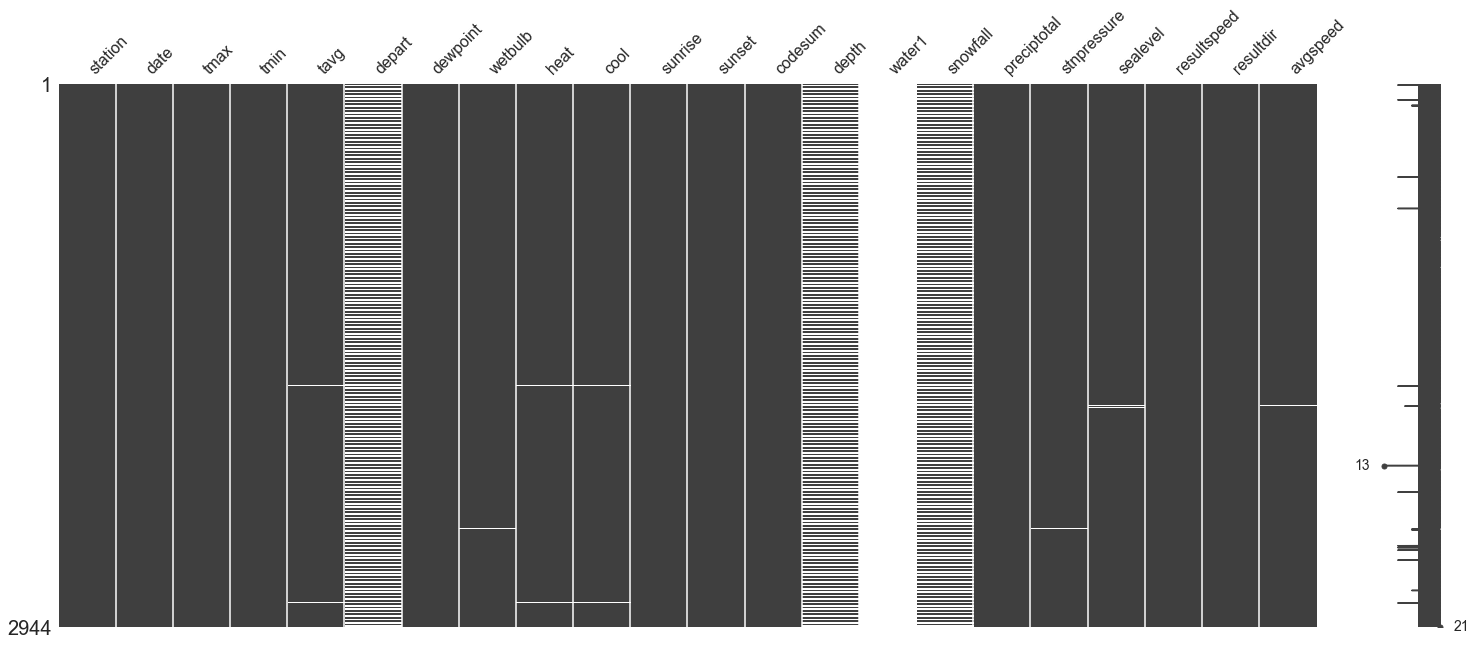

In [40]:
# Let's visualise missing data
msno.matrix(weather)

**Thoughts**: Straight away, we can see that ```depart```, ```depth```, ```water1```, ```snowfall``` columns are missing a large chunk of data. The missing values in the other columns can be manually imputed.

**One-hot encoding ```codesum``` values**

We've decided to scrap this from our model as ```preciptotal``` may adequately represent ```rainy``` weather. Scores did not improve despite grouping these weather types and one-hot encoding them.

In [41]:
# # Ensuring there is proper spacing between different weather types
# weather_codes = ['+FC','FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL','IC', 'FG+', 'FG', 
#                  'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS', 'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 
#                  'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC']

# weather['codesum'] = weather['codesum'].apply(lambda x: ' '.join([i for i in x.split(' ') if i in weather_codes]))

**We will need to create separate dummy variables for different conditions**

These include ```raining```,  ```snowing```,  ```windy```,  ```misty``` conditions. **After multiple tests, we realise that these variables did not have a significant impact on our model and were scrapped.**

In [42]:
# # Manual creation of dummy variables which rainy, snowy, windy and misty conditions 
# weather["raining"] = np.where(weather['codesum'].str.contains("|".join(['TS', 'RA', 'DZ', 'SH'])), 1, 0)
# weather["snowing"] = np.where(weather['codesum'].str.contains("|".join(['SN', 'SG', 'GS', 'PL', 'IC', 'DR', 'BC', 'GR'])), 1, 0)
# weather["windy"] = np.where(weather['codesum'].str.contains("|".join(['SQ', 'DS', 'SS', 'PO', 'BL'])), 1, 0)
# weather["misty"] = np.where(weather['codesum'].str.contains("|".join(['BR', 'HZ', 'FG', 'FU'])), 1, 0)

On hindsight, a large part of significant weather conditions is rain, which may be captured in total precipitation. We could drop the remaining columns.

**Tidying / Fixing missing ```tavg``` values**

In [43]:
## We can manually inpute missing tavg values
weather['tavg'][weather['tavg'].isna()] = 0.5*(weather['tmax'][weather['tavg'].isna()] + weather['tmin'][weather['tavg'].isna()])

**Tidying / Fixing ```preciptotal``` values that are shown as trace amounts (i.e. T)**

In [44]:
# We can manually inpute missing preciptotal
weather.loc[weather['preciptotal'] == ("  T" or "T")].head()

station       date  tmax  tmin tavg depart  dewpoint wetbulb heat cool  \
6         1 2007-05-04    66    49   58      4        41      50    7    0   
8         1 2007-05-05    66    53   60      5        38      49    5    0   
9         2 2007-05-05    66    54   60    NaN        39      50    5    0   
12        1 2007-05-07    83    47   65     10        41      54    0    0   
15        2 2007-05-08    80    60   70    NaN        57      63    0    5   

    ... codesum depth water1 snowfall preciptotal stnpressure sealevel  \
6   ...      RA     0    NaN      0.0           T       29.31    30.05   
8   ...             0    NaN      0.0           T       29.40    30.10   
9   ...           NaN    NaN      NaN           T       29.46    30.09   
12  ...      RA     0    NaN      0.0           T       29.38    30.12   
15  ...      HZ   NaN    NaN      NaN           T       29.36    30.02   

   resultspeed resultdir  avgspeed  
6         10.4         8      10.8  
8         11.7         7      12.0  
9         11.2         7      11.5  
12         8.6        18      10.5  
15         2.5         8       5.4  

[5 rows x 22 columns]

In [45]:
# We can safely assume that if the codesum does not indicate a significant weather type, we can assume preciptotal = 0
weather['preciptotal'] = [0.05 if i in ["T", "  T"] else i for i in weather['preciptotal']]

**Tidying / Fixing missing ```stnpressure``` values**

In [46]:
## Let's tidy stnpressure using the median corresponding to the dataset
imputed_stnpressure = {}
for i in weather['station'].unique():
    imputed_stnpressure[i] = weather[weather['station'] == i]['stnpressure'].median()

In [47]:
# We can imput the stnpressure by using the median values from different weather conditions
weather['stnpressure'][weather['stnpressure'].isna()] = weather['station'][weather['stnpressure'].isna()].map(imputed_stnpressure)

**Tidying / Fixing missing ```sealevel``` values**

In [48]:
## Let's tidy sealevel using the median corresponding to the dataset
imputed_sealevel = {}
for i in weather['station'].unique():
    imputed_sealevel[i] = weather[weather['station'] == i]['sealevel'].median()

In [49]:
# We can imput the sealevel by using the median values from different weather conditions
weather['sealevel'][weather['sealevel'].isna()] = weather['station'][weather['sealevel'].isna()].map(imputed_stnpressure)

**Tidying / Fixing missing ```avgspeed``` values**

In [50]:
## Let's tidy avgspeed using the median corresponding to the dataset
imputed_avgspeed = {}
for i in weather['station'].unique():
    imputed_avgspeed[i] = weather[weather['codesum'] == i]['avgspeed'].median()

In [51]:
# We can imput the acgspeed by using the median values from different weather conditions
weather['avgspeed'][weather['avgspeed'].isna()] = weather['station'][weather['avgspeed'].isna()].map(imputed_avgspeed)

**Ensuring datatypes are representative / Deciding which columns to keep**

In [52]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   object        
 5   depart       1472 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2940 non-null   object        
 8   heat         2933 non-null   object        
 9   cool         2933 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        1472 non-null   object        
 14  water1       0 non-null      object        
 15  snowfall     1472 non-null   object        
 16  precip

In [53]:
weather[['tavg', 'preciptotal', 
         'stnpressure', 'sealevel', 
         'avgspeed']] = weather[['tavg', 'preciptotal', 
                                 'stnpressure', 'sealevel', 
                                 'avgspeed']].astype(float)

### More feature engineering
* Humidity
* The interaction between temperature and total precipitation
* Lagging weather measurements
* Temperature range
* Daylight exposure

**Creation of humidity variable**

In [54]:
# Feature Engineering #1: Relative humdity
weather['humidity'] = 100*(np.exp((17.67 * ((weather['dewpoint'] - 32) * (5/9))) / 
                                           (243.5 + ((weather['dewpoint'] - 32) * (5/9)))) 
                                    /
                                    np.exp((17.67 * ((weather['tavg'] - 32) * (5/9))) /
                                           (243.5 + ((weather['tavg'] - 32) * (5/9)))))

**Formula for humidity**
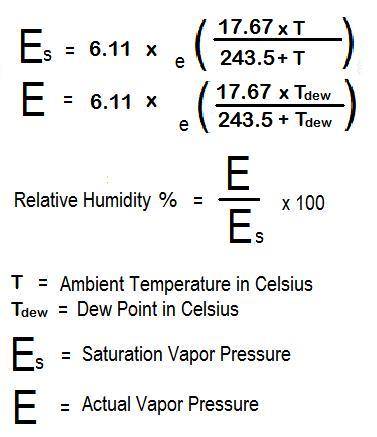

**Creation of daily temperature range variable**

In [55]:
# Feature engineering #2: Temperature range
weather['trange'] = weather['tmax'] - weather['tmin']

**Creation of daylight mins variable**

Scrapped; **After testing, these do not have a significant impact on our model.**

In [56]:
# # Feature engineering #3: Daylight hours
# station1 = weather.loc[weather['station']==1] # Only station 1 records sunset / sunrise hours

# # Converting to the right format
# station1['sunset'] = station1['sunset'].map(lambda x : (str(int(x[0:2]) + 1) + '00') if x[2:4] == '60' else x)
# station1['sunrise'] = station1['sunrise'].map(lambda x : (str(int(x[0:2]) + 1) + '00') if x[2:4] == '60' else x)

In [57]:
# # Calculating daylight time in minutes
# station1['sunset_t'] = station1['sunset'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
# station1['sunrise_t'] = station1['sunrise'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
# station1['daylight_mins'] = (station1['sunset_t'] - station1['sunrise_t']).map(lambda x : x.seconds / 60)

In [58]:
# # Merging back with the actual dataset
# weather = weather.merge(station1[['date', 'daylight_mins']], on="date")

### Addressing multi-collinearity

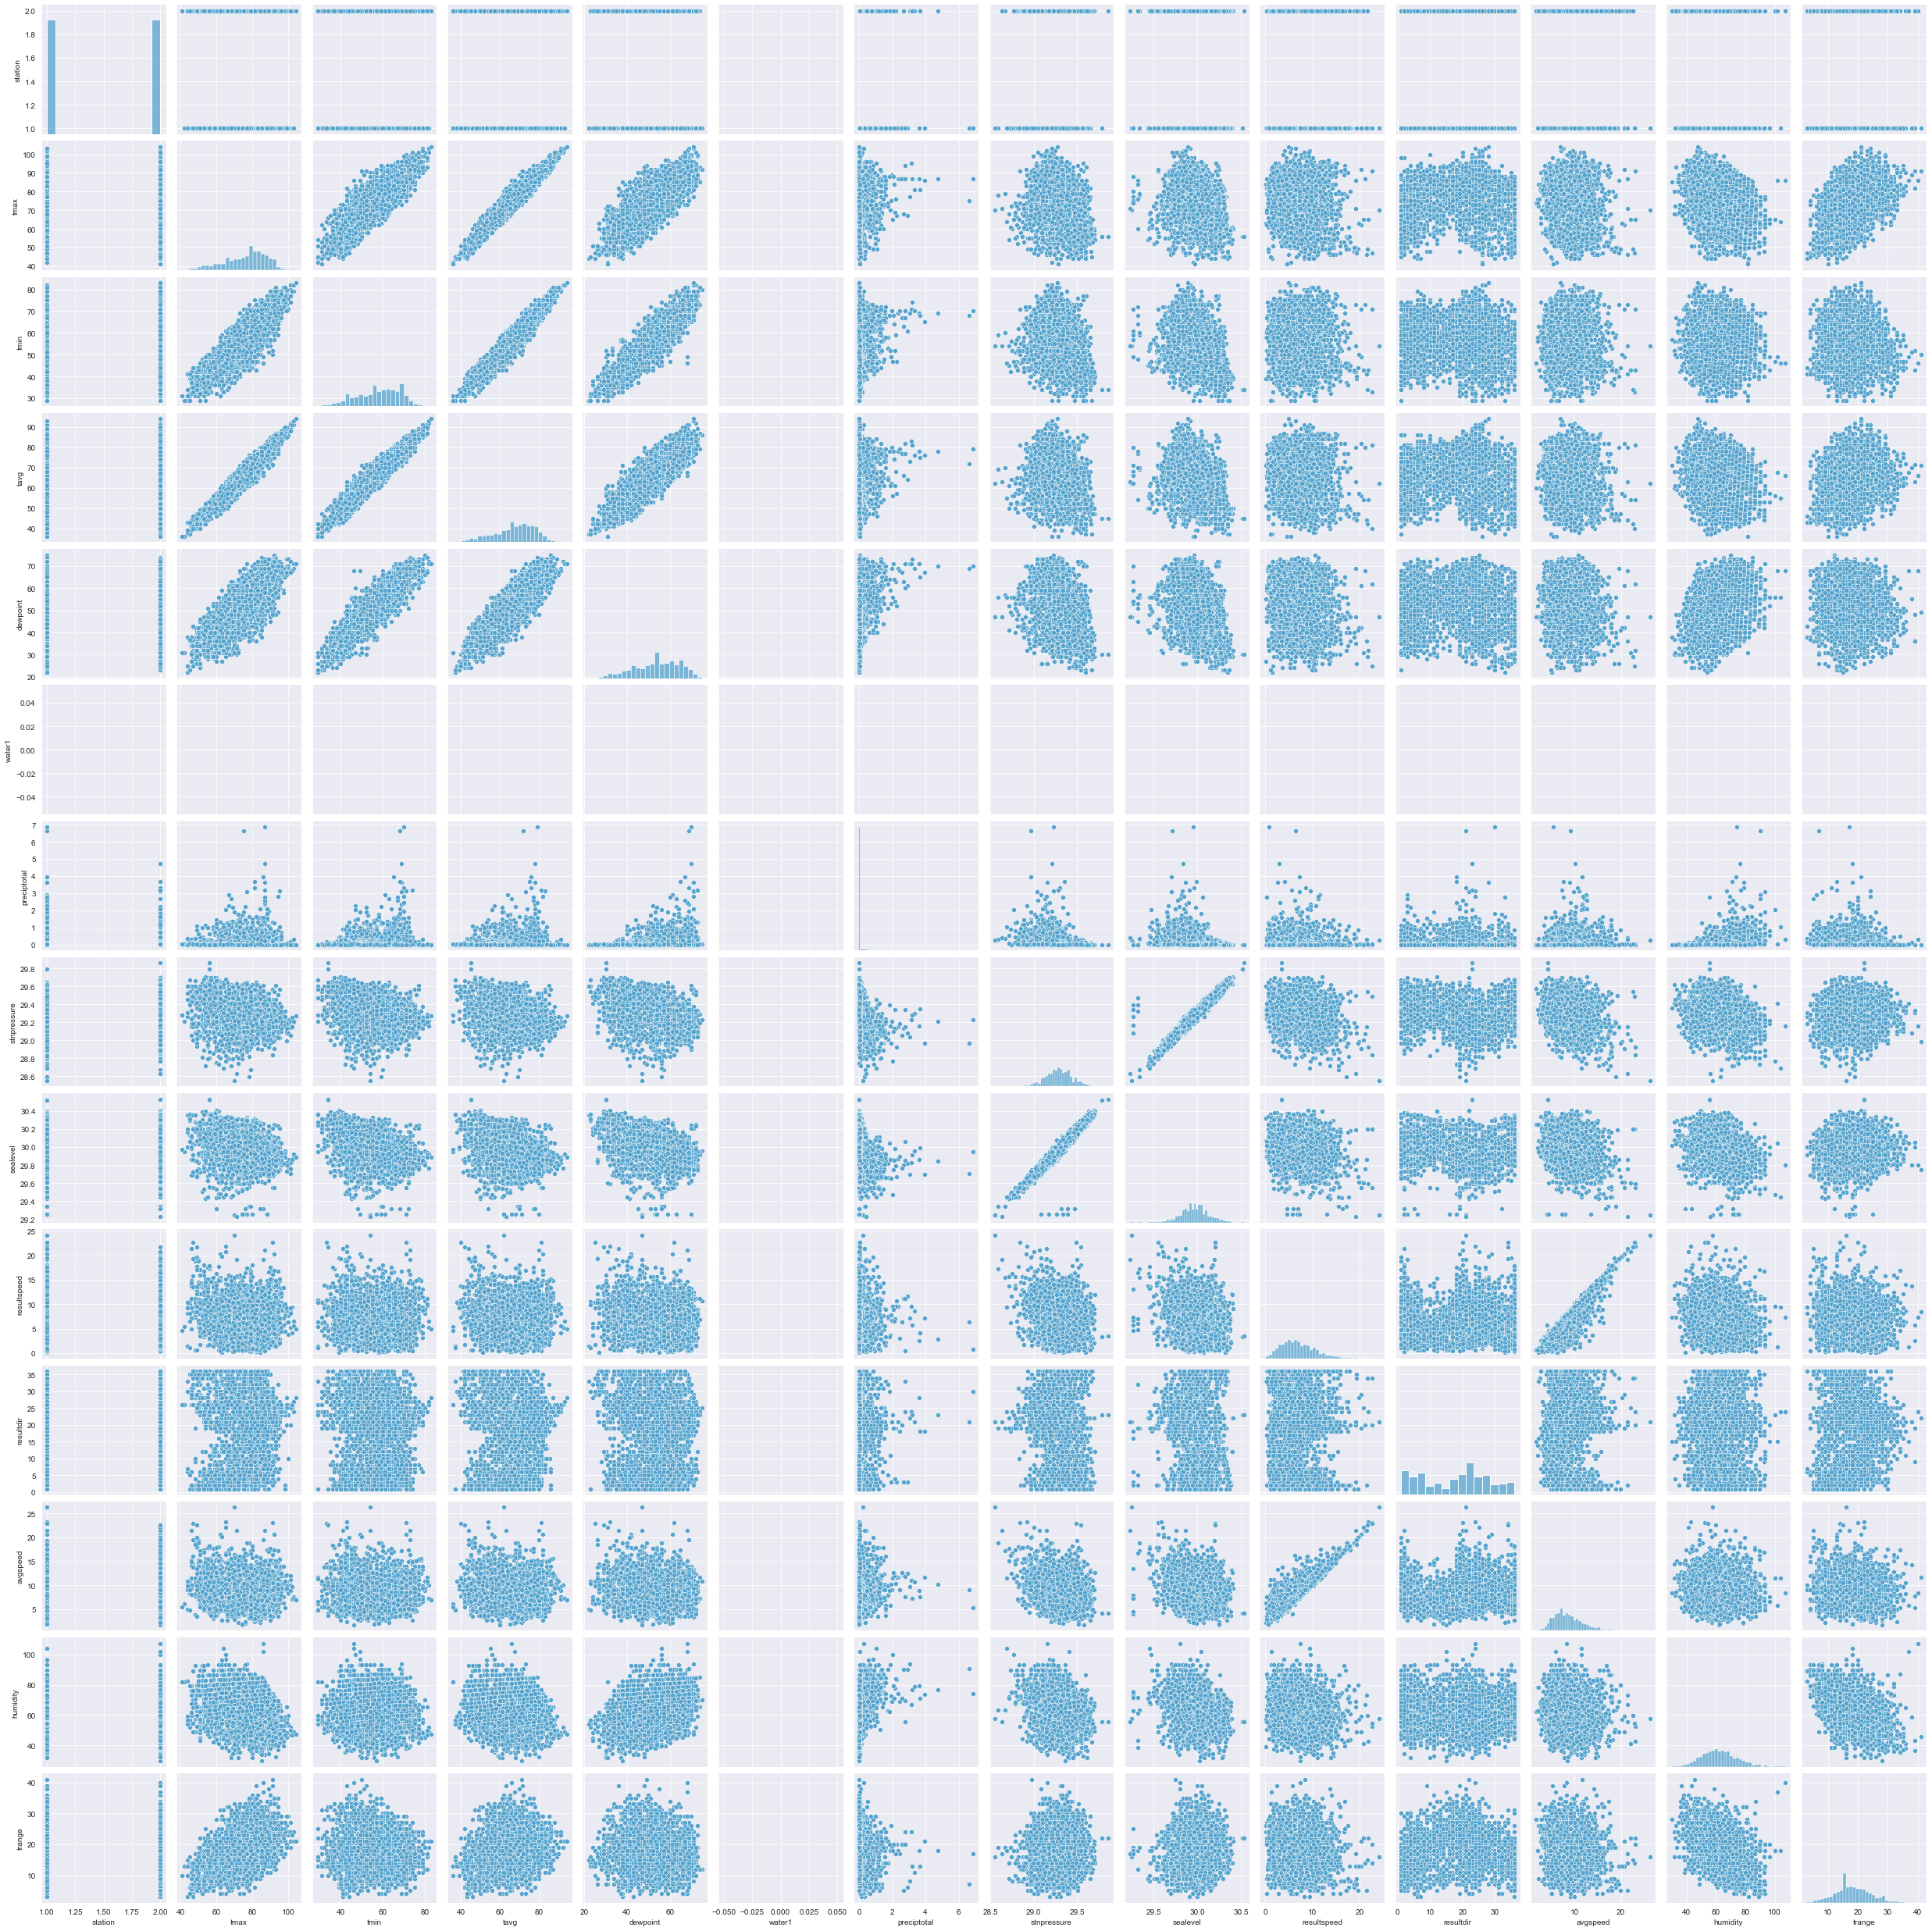

Wall time: 31.9 s


In [59]:
%%time
sns.pairplot(weather)
plt.show()

**Thoughts**: This looks like a very complicated plot so we will provide a simpler correlation matrix / heatmap below

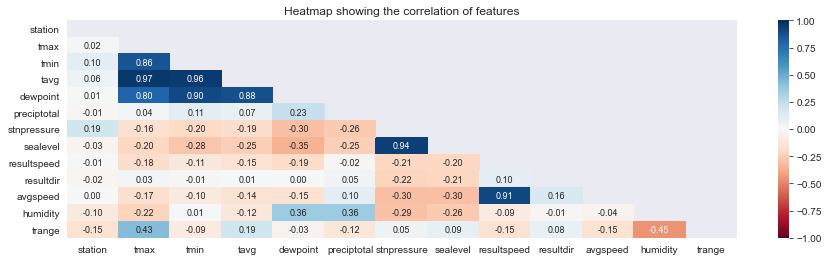

Wall time: 1.18 s


In [60]:
%%time

# Let's plot a heatmap to look at the correlation matrix of the selected variables
## Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(weather.corr())

# using the upper triangle matrix as mask 
plt.figure(figsize=(15,4))
plt.title("Heatmap showing the correlation of features")
sns.heatmap(weather.corr(), annot=True, mask= matrix, cmap="RdBu", 
           fmt=".2f", annot_kws={"size":9}, vmin=-1, vmax=1)
plt.show()

**Thoughts**

* We can drop ```tmax``` and ```tmin``` as they are highly correlated with ```tavg```
* We can drop ```dewpoint``` as it is highly correlated with ```tavg```
* ```sealevel``` is also highly correlated with ```stnpressure```; We can drop either one
* ```avgspeed``` also has a high correlation with ```resultspeed```; We can drop ```avgspeed```

In [61]:
# Let's first drop sunrise and sunset columns
weather.drop(columns=['sunrise', 'sunset', 
#                       'windy', 'snowing', 
                      'tmax', 'tmin', 'dewpoint', 'stnpressure', 'avgspeed'], inplace=True)

**Creation of lagged weather statistics**

Columns to average include: ```tmax```, ```tmin```, ```tavg```, ```dewpoint```, ```stnpressure```, ```sealevel```, ```avgspeed```, ```humidity```

Columns to sum include: ```preciptotal```, ```raining```, ```misty```, ```daylight_mins```

Scrapped; **After testing, these do not improve our model significantly.**

In [62]:
# # Defining our columns of interest
# ## Columns to compute 5-day moving averages
# cols_to_average = ['tavg', 'trange', 'resultspeed', 'resultdir', 'humidity', 'preciptotal']

# ## Columns to compute 5-day moving averages
# cols_to_sum = ['preciptotal', 'raining', 'misty']

# # Creation of sub-groups filtered by station
# station1 = weather.loc[weather['station']==1].set_index('date')
# station2 = weather.loc[weather['station']==2].set_index('date')

In [63]:
# # # 5-day rolling averages
# # station1_5ma = station1[cols_to_average].rolling(5).mean()
# # station1_5ma['station'] = 1
# # station2_5ma = station2[cols_to_average].rolling(5).mean()
# # station2_5ma['station'] = 2

# # # Merging rolling averages from both sub-groups
# # stations_5ma = pd.concat([station1_5ma, station2_5ma], axis=0)

# # 10-day rolling averages
# station1_ma = station1[cols_to_average].rolling(18).mean()
# station1_ma['station'] = 1
# station2_ma = station2[cols_to_average].rolling(18).mean()
# station2_ma['station'] = 2

# # Merging rolling averages from both sub-groups
# stations_ma = pd.concat([station1_ma, station2_ma], axis=0)

# # Combining these rolling averages with the overall weather dataset
# # weather = weather.merge(stations_5ma, on=['date', 'station'], how='left', suffixes=["", "_5ma"])
# weather = weather.merge(stations_ma, on=['date', 'station'], how='left', suffixes=["", "_18ma"])

In [64]:
# # # 5-day rolling sums
# # station1_5sum = station1[cols_to_sum].rolling(5).sum()
# # station1_5sum['station'] = 1
# # station2_5sum = station2[cols_to_sum].rolling(5).sum()
# # station2_5sum['station'] = 2

# # # Merging rolling sums from both sub-groups
# # stations_5sum = pd.concat([station1_5sum, station2_5sum], axis=0)

# # # 10-day rolling sums
# station1_sum = station1[cols_to_sum].rolling(18).sum()
# station1_sum['station'] = 1
# station2_sum = station2[cols_to_sum].rolling(18).sum()
# station2_sum['station'] = 2

# # Merging rolling sums from both sub-groups
# stations_sum = pd.concat([station1_sum, station2_sum], axis=0)

# # # Combining these rolling averages with the overall weather dataset
# # weather = weather.merge(stations_5sum, on=['date', 'station'], how='left', suffixes=["", "_5sum"])
# weather = weather.merge(stations_sum, on=['date', 'station'], how='left', suffixes=["", "_18sum"])

**Checking for multi-collinearity again**

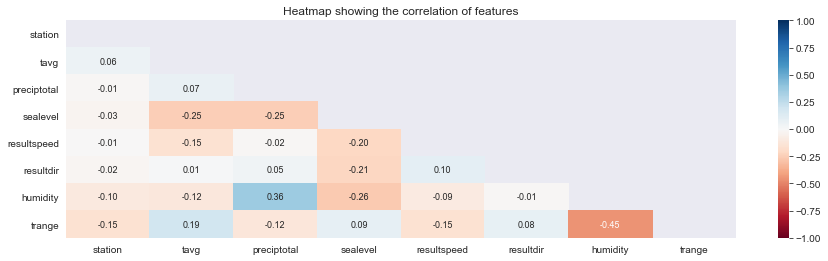

In [65]:
# Let's plot a heatmap to look at the correlation matrix of the selected variables
## Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(weather.corr())

# using the upper triangle matrix as mask 
plt.figure(figsize=(15,4))
plt.title("Heatmap showing the correlation of features")
sns.heatmap(weather.corr(), annot=True, mask= matrix, cmap="RdBu", 
           fmt=".2f", annot_kws={"size":9}, vmin=-1, vmax=1)
plt.show()

In [66]:
# Dropping columns we do not need
weather.drop(columns=['depart', 'wetbulb', 'heat', 'cool', 'codesum', 'depth', 'water1', 'snowfall'], inplace=True)

**Thoughts**: Other than these columsn above, we can keep all the columns in the heatmap as they do not appear to be strongly correlated with each other.

In [67]:
# Dropping null values from weather
weather.dropna(inplace=True)

In [68]:
# Saving our tidied weather dataframe for use later
weather.to_csv('../assets/cleaned/weather_tidied.csv', index=False)

In [69]:
# Previewing our final weather dataframe
weather.head()

station       date  tavg  preciptotal  sealevel  resultspeed  resultdir  \
0        1 2007-05-01  67.0          0.0     29.82          1.7         27   
1        2 2007-05-01  68.0          0.0     29.82          2.7         25   
2        1 2007-05-02  51.0          0.0     30.09         13.0          4   
3        2 2007-05-02  52.0          0.0     30.08         13.3          2   
4        1 2007-05-03  56.0          0.0     30.12         11.7          7   

    humidity  trange  
0  56.410238      33  
1  54.497276      32  
2  71.176939      17  
3  68.594699      17  
4  54.848860      20

## Merging ```weather``` and ```train``` datasets

Now comes the tricky portion... We will need to map weather statistics to different trap locations in our train dataset. In order to do so, we will need to assign traps to a reference station (either Chicago O'Hare airport or Chicago Midway airport).

In [70]:
# We will need to create our own function to assign observations
def determine_station(lat, long):
    station1 = (41.995, -87.933) #Chicago O'Hare Intl Airpot -> lat: 41.995 long: -87.933
    station2 = (41.786, -87.752) #Chicago Midway Intl Airpot -> lat: 41.786 long: -87.752
    coordinates = (lat, long)
    return 1 if geodesic(coordinates, station1) < geodesic(coordinates, station2) else 2

In [71]:
%%time

# Apply function to map our function
train_dum['station_ref'] = train_dum.apply(lambda i: determine_station(i['latitude'], i['longitude']), axis=1)

Wall time: 4.14 s


In [72]:
# Let the merging begin
train_combined = train_dum.merge(weather, how='left',
                            left_on=['station_ref', 'date'],
                            right_on=['station', 'date'])

In [73]:
# Previewing our final dataset
eda_clean(train_combined)

Dataset Statistics:
Shape of dataframe: (8475, 110)
--------------------------------------
Null values in dataframe: 192
--------------------------------------
% of Null values in dataframe: 2.27%
--------------------------------------
Total duplicate rows: 0
--------------------------------------
% duplicate rows: 0.0%

Column names: Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       ...
       'ERRATICUS', 'station_ref', 'station', 'tavg', 'preciptotal',
       'sealevel', 'resultspeed', 'resultdir', 'humidity', 'trange'],
      dtype='object', length=110)

Variable Types
Columns Count: 
uint8             77
int64             14
float64           10
object             7
datetime64[ns]     1
UInt32             1
dtype: int64


In [74]:
# Drop missing values
train_combined.dropna(inplace=True)

Text(0, 0.5, 'Features')

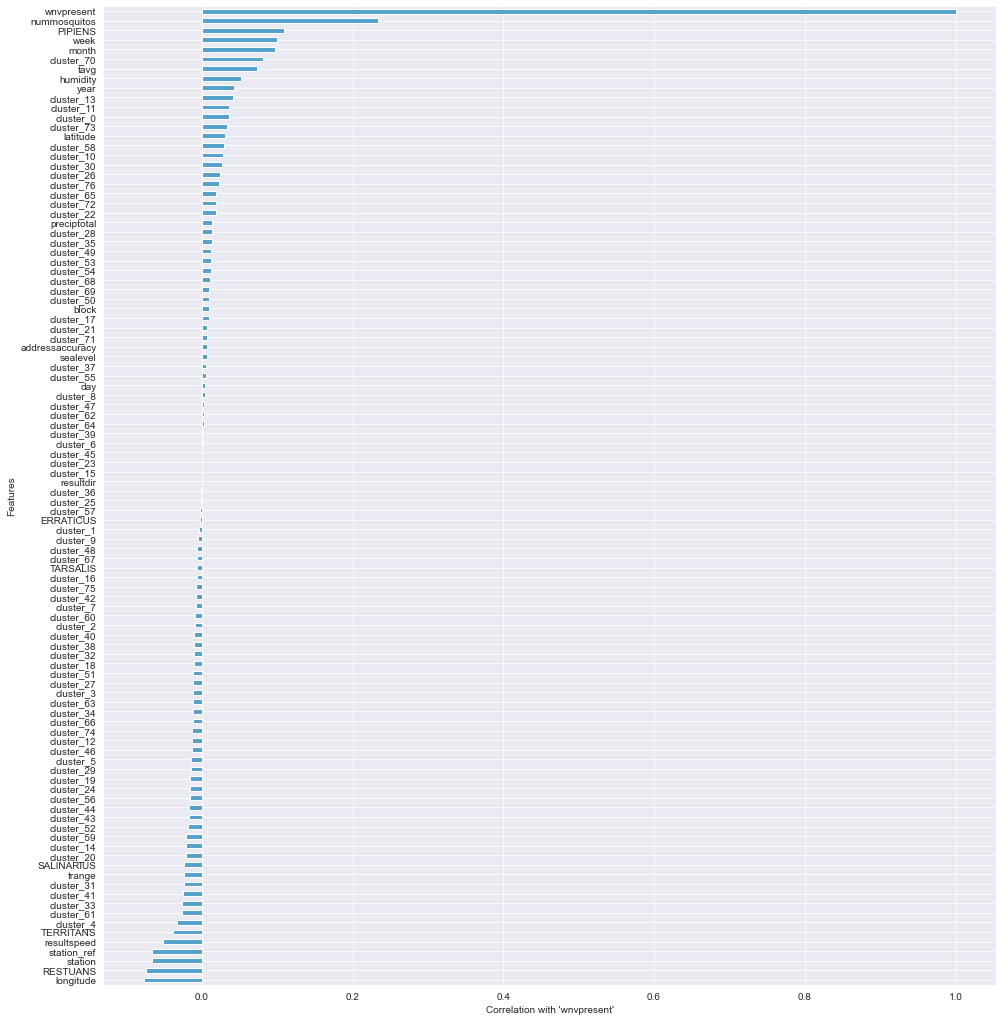

In [75]:
# Zooming in
plt.figure(figsize=(16, 18))
train_combined.corr()['wnvpresent'].sort_values().plot(kind="barh")
plt.xlabel("Correlation with 'wnvpresent'")
plt.ylabel("Features")

In [76]:
# We can drop a number of redundant columns
cols_to_drop = ['address', 'species', 'block', 'street', 'addressaccuracy', 
                'latitude', 'longitude', 
                'day', 'trap', 'coord',
                'nummosquitos']

In [77]:
# Dropping unneccesary columns
train_combined.drop(columns=cols_to_drop, inplace=True)

In [78]:
# Saving our combined train / weather dataset into a csv
train_combined.to_csv('../assets/cleaned/train_tidied.csv', index=False)

## Tidying / Exploring our ```spray``` dataset

In [79]:
# Import Kaggle spray.csv
spray = pd.read_csv('../assets/raw/spray.csv', parse_dates=['Date'])

# Converting our column names to lowercase for standardization
spray.columns = spray.columns.str.lower()

In [80]:
# Taking a quick look at our spray dataset
eda_clean(spray)

Dataset Statistics:
Shape of dataframe: (14835, 4)
--------------------------------------
Null values in dataframe: 584
--------------------------------------
% of Null values in dataframe: 3.94%
--------------------------------------
Total duplicate rows: 541
--------------------------------------
% duplicate rows: 3.65%

Column names: Index(['date', 'time', 'latitude', 'longitude'], dtype='object')

Variable Types
Columns Count: 
float64           2
datetime64[ns]    1
object            1
dtype: int64


In [81]:
# Let's check out the duplicated rows
spray[spray.duplicated()].head()

date        time   latitude  longitude
485 2011-09-07  7:43:40 PM  41.983917 -87.793088
490 2011-09-07  7:44:32 PM  41.986460 -87.794225
491 2011-09-07  7:44:32 PM  41.986460 -87.794225
492 2011-09-07  7:44:32 PM  41.986460 -87.794225
493 2011-09-07  7:44:32 PM  41.986460 -87.794225

**Thoughts**: There a total of 541 duplicate records for spray. Perhaps this may have been a way to indicate the total dosage relative to a single location. We're just speculating here... but as a large portion of these duplicates appear to correspond to a single date-time entry, we can assume that these are likely data collection errors.

**Proposed action**: We will drop duplicate rows

In [82]:
# Dropping duplicate rows
print(f"Spray dimensions: {spray.shape}")
spray.drop_duplicates(keep='first', inplace=True)
print(f"Amended spray dimensions: {spray.shape}")

Spray dimensions: (14835, 4)
Amended spray dimensions: (14294, 4)


In [83]:
# Where are the missing values located?
spray.isnull().sum()/len(spray)*100

date         0.00000
time         4.08563
latitude     0.00000
longitude    0.00000
dtype: float64

**Thoughts**: *Null* values are concentrated within the ```time``` column, which might be a tad too granular for us.

**Proposed action**: We will drop the ```time``` column from the ```spray``` dataset.

In [84]:
# We can drop the time column as it is not a key driver for us
spray.drop(columns='time', inplace=True)

In [85]:
# Let's see the trajectory of sprays in recent years
spray_ts = spray.groupby('date').size()

**Visualising spraying trends over the past few years**

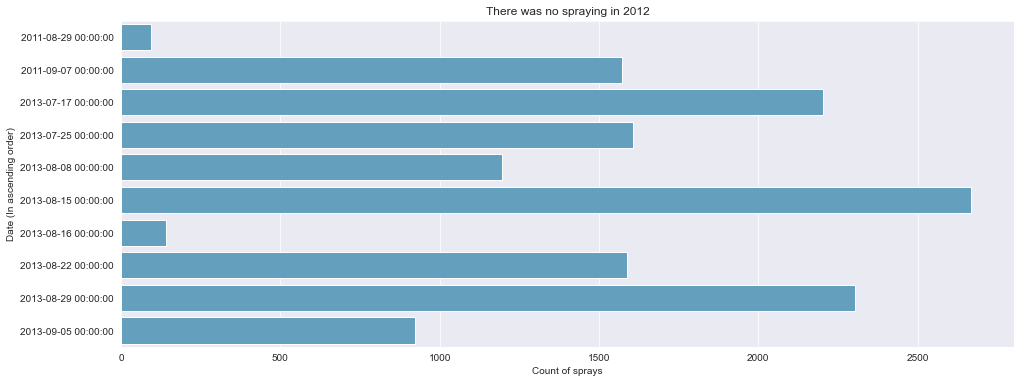

In [86]:
# Charting our time-series
plt.figure(figsize=(16, 6))
sns.barplot(y=spray_ts.index, x=spray_ts.values, color=sns.color_palette('icefire')[0])
plt.title("There was no spraying in 2012")
plt.xlabel("Count of sprays")
plt.ylabel("Date (In ascending order)")
plt.show()

**Thoughts**: Bulk of spray efforts took place in 2013, especially during the months of July-September. There also was no spraying in 2012. More work needs to be done as there may be seasonality factors at play.

**Visualising spraying trends over the past few years; Utilising mapdata**

The map files mapdata_copyright_openstreetmap_contributors.rds and mapdata_copyright_openstreetmap_contributors.txt are from Open Streetmap. We will be utilising them in our visualisations.

In [87]:
# Filtering some outliers (We've realised this after plotting)
spray[['latitude', 'longitude']].describe()

latitude     longitude
count  14294.000000  14294.000000
mean      41.901739    -87.734512
std        0.105100      0.067599
min       41.713925    -88.096468
25%       41.782669    -87.789607
50%       41.937578    -87.724781
75%       41.977217    -87.692107
max       42.395983    -87.586727

In [88]:
# Removing sprays that occured outside of the parameters provided in the map
spray_filtered = spray.loc[spray['latitude'] < 42.1]

In [89]:
# Let's plot where sprays have been in the past
mapdata_txt = np.loadtxt('../assets/raw/mapdata_copyright_openstreetmap_contributors.txt')

aspect = mapdata_txt.shape[0] * 1.0 / mapdata_txt.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

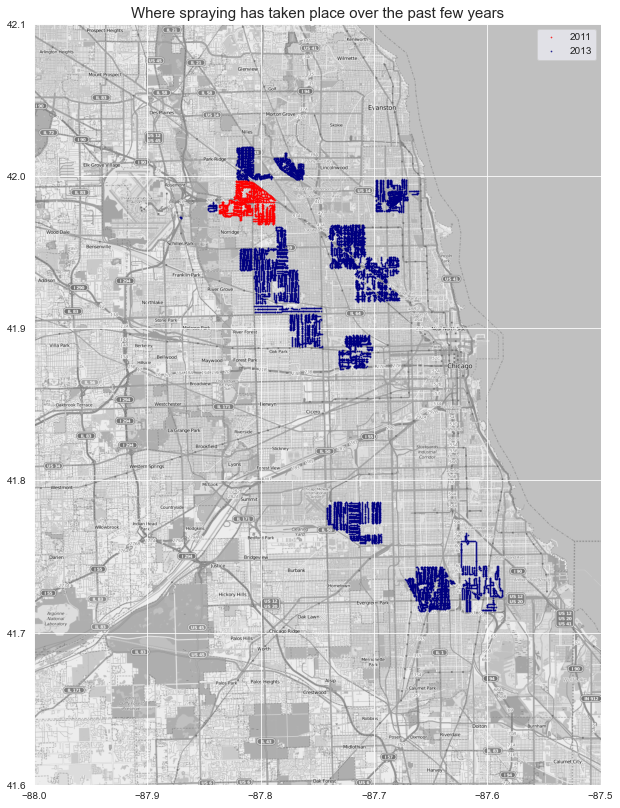

In [90]:
plt.figure(figsize=(14,14))
plt.imshow(mapdata_txt, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

spray_filtered['year'] = spray_filtered['date'].dt.year
spray_2011 = spray_filtered.loc[spray_filtered['year']==2011]
spray_2013 = spray_filtered.loc[spray_filtered['year']==2013]
spray_filtered.drop(['year'], axis=1, inplace=True)

spray_2011_chart = plt.scatter(spray_2011['longitude'], spray_2011['latitude'], 
                               c='red', marker='x', s=0.5, alpha=0.8, label ='2011')

spray_2013_chart = plt.scatter(spray_2013['longitude'], spray_2013['latitude'], 
                               c='navy', marker='o', s=0.5, alpha=0.8, label='2013')

plt.title('Where spraying has taken place over the past few years', fontsize=15)
plt.legend()
plt.show();

In [91]:
# Saving our spray dataset for use later
spray.to_csv('../assets/cleaned/spray_tidied.csv', index=False)